In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from tqdm import tqdm
from datetime import date, timedelta
import plotly.express as px
import plotly.graph_objects as go

In [2]:
dataframe = pd.read_csv('big_data_added_columns.csv')

/var/folders/kc/jdw9593x3ksdmnhyd571zm440000gp/T/ipykernel_38388/3399566237.py:1: DtypeWarning: Columns (2,5,6,8,10,11,14,15,16,17,18,19,20,21,23,24,25,27,28,32,49,51) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv('big_data_added_columns.csv')


In [3]:
dataframe.head()

,ROW_NUM,USER_ID,INV_OPEN_DATE,INV_NUM_ACCOUNTS,INV_ACC_BAL,MONEY_ACCOUNT_OPEN_DATE,MONEY_ACCOUNT_STATUS,MONEY_FICO,MONEY_DATA_UPDATE_DATE,MONEY_TOTAL_BALANCE,...,date_of_creating_new_columns,days_with_invest,days_with_money,days_with_relay,days_with_loan,days_with_credit,first_product,second_product,xbuy_days,xbuy_date
0,1.0,22477118.0,NaN,NaN,NaN,2022-02-18,Active,850.0,2023-03-21,32148.42,...,2023-03-31,NaN,406.0,1249.0,NaN,NaN,relay,money,843.0,2022-02-18
1,1.0,22477129.0,2022-02-19,2.0,65.40,2022-02-18,Active,9003.0,2023-03-21,0.50,...,2023-03-31,405.0,406.0,121.0,NaN,NaN,money,invest,1.0,2022-02-19
2,1.0,22477145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2023-03-31,NaN,NaN,940.0,NaN,NaN,relay,NaN,NaN,NaN
3,1.0,22477153.0,NaN,NaN,NaN,2022-02-19,Active,556.0,2023-03-21,0.93,...,2023-03-31,NaN,405.0,239.0,NaN,NaN,money,relay,166.0,2022-08-04
4,1.0,22477154.0,2022-02-18,3.0,257713.22,NaN,NaN,NaN,NaN,NaN,...,2023-03-31,406.0,NaN,136.0,NaN,NaN,invest,relay,270.0,2022-11-15


In [30]:
def get_xbuy_map_meds(dataframe, daterange = 'monthly',):
    #calculate the median xbuy_days for each unit in the available daterange
    #filter the dataframe to include include rows with xbuy_days that are not NaN
    dataframe = dataframe = dataframe[dataframe['xbuy_days'].notna()].copy()
    #convert the xbuy_date column to datetime
    dataframe['xbuy_date'] = pd.to_datetime(dataframe['xbuy_date'])


    xbuy_map = {}
    #step 1. populate the keys of the xbuy_map
    if daterange == 'yearly':
        range_of_dates = pd.date_range(start = dataframe['xbuy_date'].min(), end = dataframe['xbuy_date'].max(), freq = 'Y')
    elif daterange == 'monthly':
        range_of_dates = pd.date_range(start = dataframe['xbuy_date'].min(), end = dataframe['xbuy_date'].max(), freq = 'M')
    elif daterange == 'weekly':
        range_of_dates = pd.date_range(start = dataframe['xbuy_date'].min(), end = dataframe['xbuy_date'].max(), freq = 'W')
    elif daterange == 'daily':
        range_of_dates = pd.date_range(start = dataframe['xbuy_date'].min(), end = dataframe['xbuy_date'].max(), freq = 'D')
    

    #convert the range_of_dates to a list
    range_of_dates = range_of_dates.to_list()


    for index, date in tqdm(enumerate(range_of_dates)):
        if index == 0:
            continue
        else:
            #get a subdf that contains all the xbuy_days between the current date and the previous date
            subdf = dataframe[(dataframe['xbuy_date'] >= range_of_dates[index-1]) & (dataframe['xbuy_date'] < date)]
            #get the median xbuy_days for each unit in the subdf
            median_xbuy_days = subdf['xbuy_days'].median()

            #add the median xbuy_days to the xbuy_map
            xbuy_map[date] = median_xbuy_days

    return xbuy_map


def get_xbuy_map_all_vals(dataframe, daterange = 'monthly'):
    #filter the dataframe to include include rows with xbuy_days that are not NaN
    dataframe = dataframe = dataframe[dataframe['xbuy_days'].notna()].copy()
    #convert the xbuy_date column to datetime
    dataframe['xbuy_date'] = pd.to_datetime(dataframe['xbuy_date'])


    xbuy_map = {}
    #step 1. populate the keys of the xbuy_map
    if daterange == 'yearly':
        range_of_dates = pd.date_range(start = dataframe['xbuy_date'].min(), end = dataframe['xbuy_date'].max(), freq = 'Y')
    elif daterange == 'monthly':
        range_of_dates = pd.date_range(start = dataframe['xbuy_date'].min(), end = dataframe['xbuy_date'].max(), freq = 'M')
    elif daterange == 'weekly':
        range_of_dates = pd.date_range(start = dataframe['xbuy_date'].min(), end = dataframe['xbuy_date'].max(), freq = 'W')
    elif daterange == 'daily':
        range_of_dates = pd.date_range(start = dataframe['xbuy_date'].min(), end = dataframe['xbuy_date'].max(), freq = 'D')
    

    #convert the range_of_dates to a list
    range_of_dates = range_of_dates.to_list()


    for index, date in tqdm(enumerate(range_of_dates)):
        if index == 0:
            continue
        else:
            #get a subdf that contains all the xbuy_days between the current date and the previous date
            subdf = dataframe[(dataframe['xbuy_date'] >= range_of_dates[index-1]) & (dataframe['xbuy_date'] < date)]
            #add the xbuy_days to the xbuy_map
            xbuy_map[date] = subdf['xbuy_days'].to_list()

    return xbuy_map




In [ ]:
xbuy_map_yearly = get_xbuy_map_meds(daterange = 'yearly', dataframe = dataframe)
xbuy_map_monthly = get_xbuy_map_meds(daterange = 'monthly', dataframe = dataframe)
xbuy_map_weekly = get_xbuy_map_meds(daterange = 'weekly', dataframe = dataframe)
xbuy_map_daily = get_xbuy_map_meds(daterange = 'daily', dataframe = dataframe)

In [31]:
xbuy_map_yearly_all_vals = get_xbuy_map_all_vals(daterange = 'yearly', dataframe = dataframe)
xbuy_map_monthly_all_vals = get_xbuy_map_all_vals(daterange = 'monthly', dataframe = dataframe)
xbuy_map_weekly_all_vals = get_xbuy_map_all_vals(daterange = 'weekly', dataframe = dataframe)
xbuy_map_daily_all_vals = get_xbuy_map_all_vals(daterange = 'daily', dataframe = dataframe)


8it [00:00, 18.07it/s]
87it [00:01, 50.93it/s] 
377it [00:04, 85.73it/s] 
2641it [00:17, 151.59it/s]


# Graphs

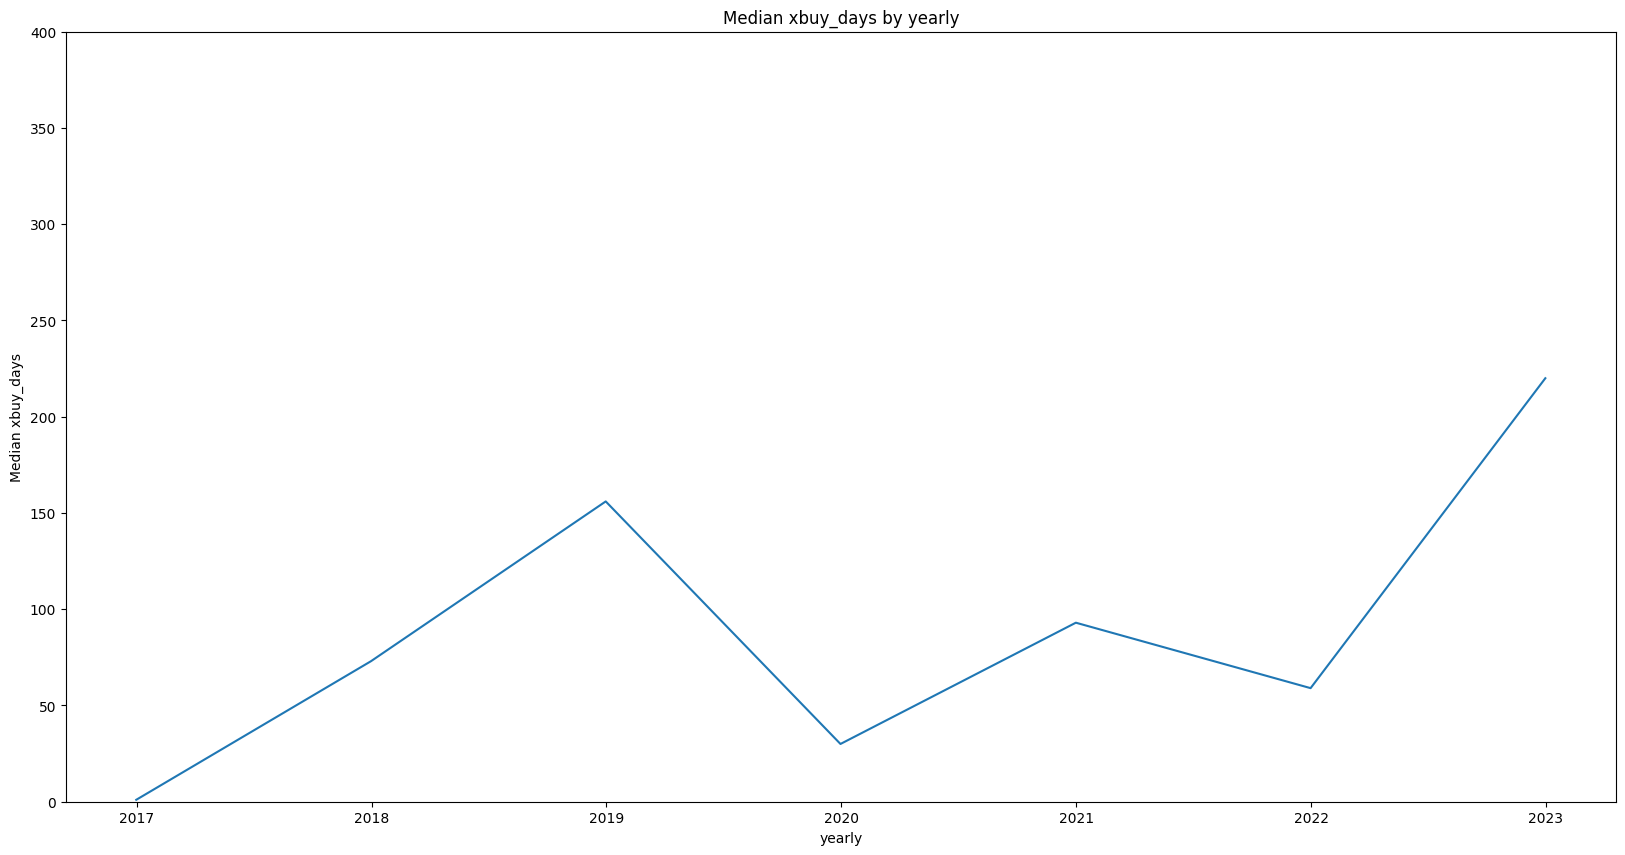

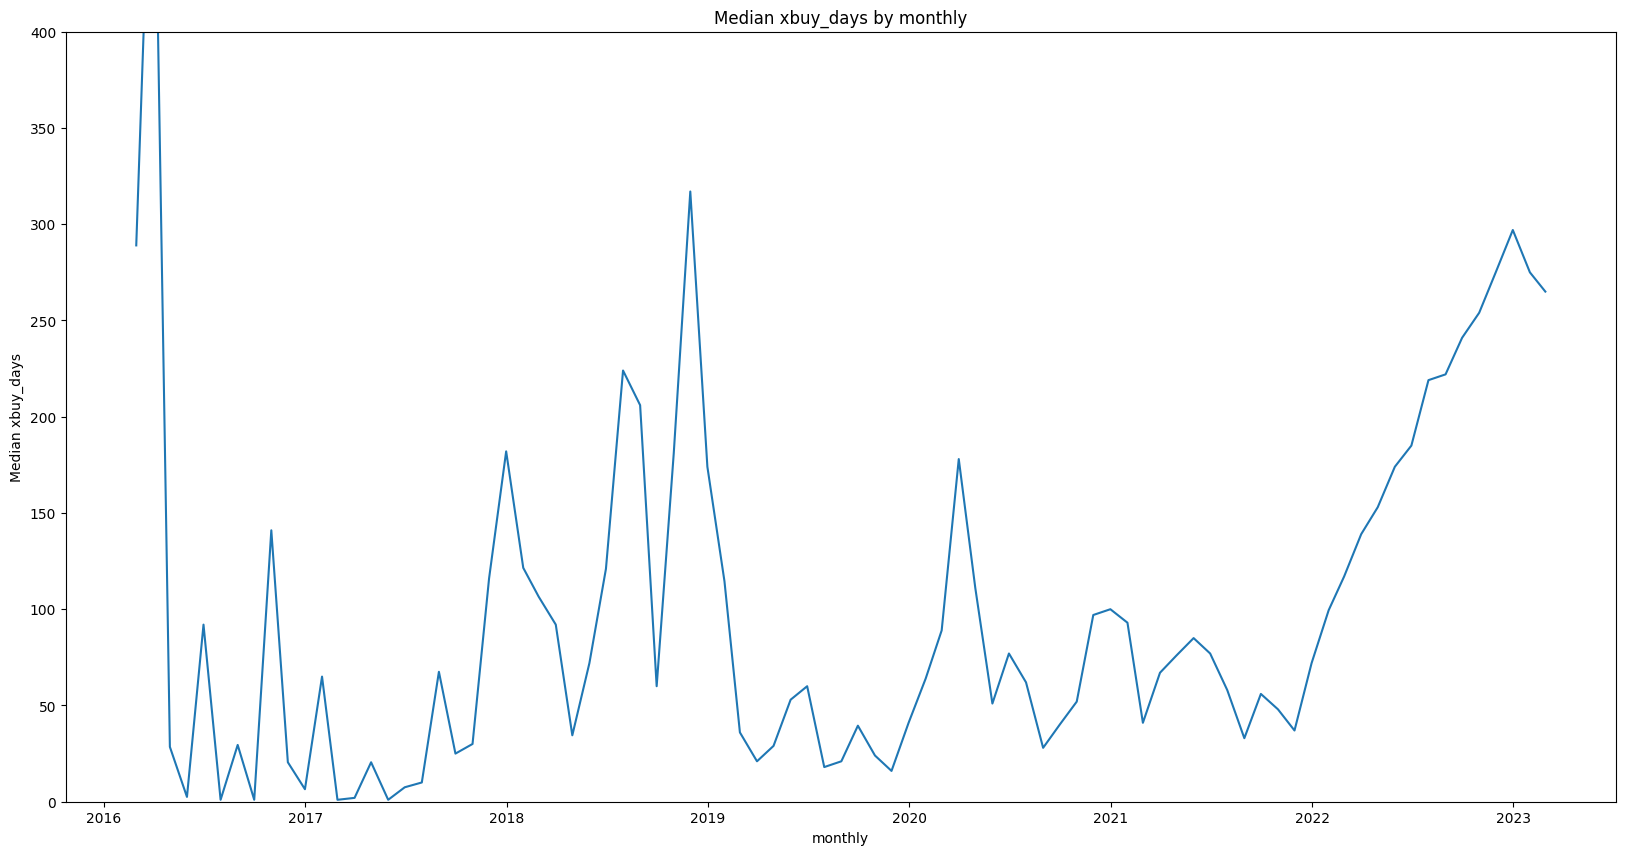

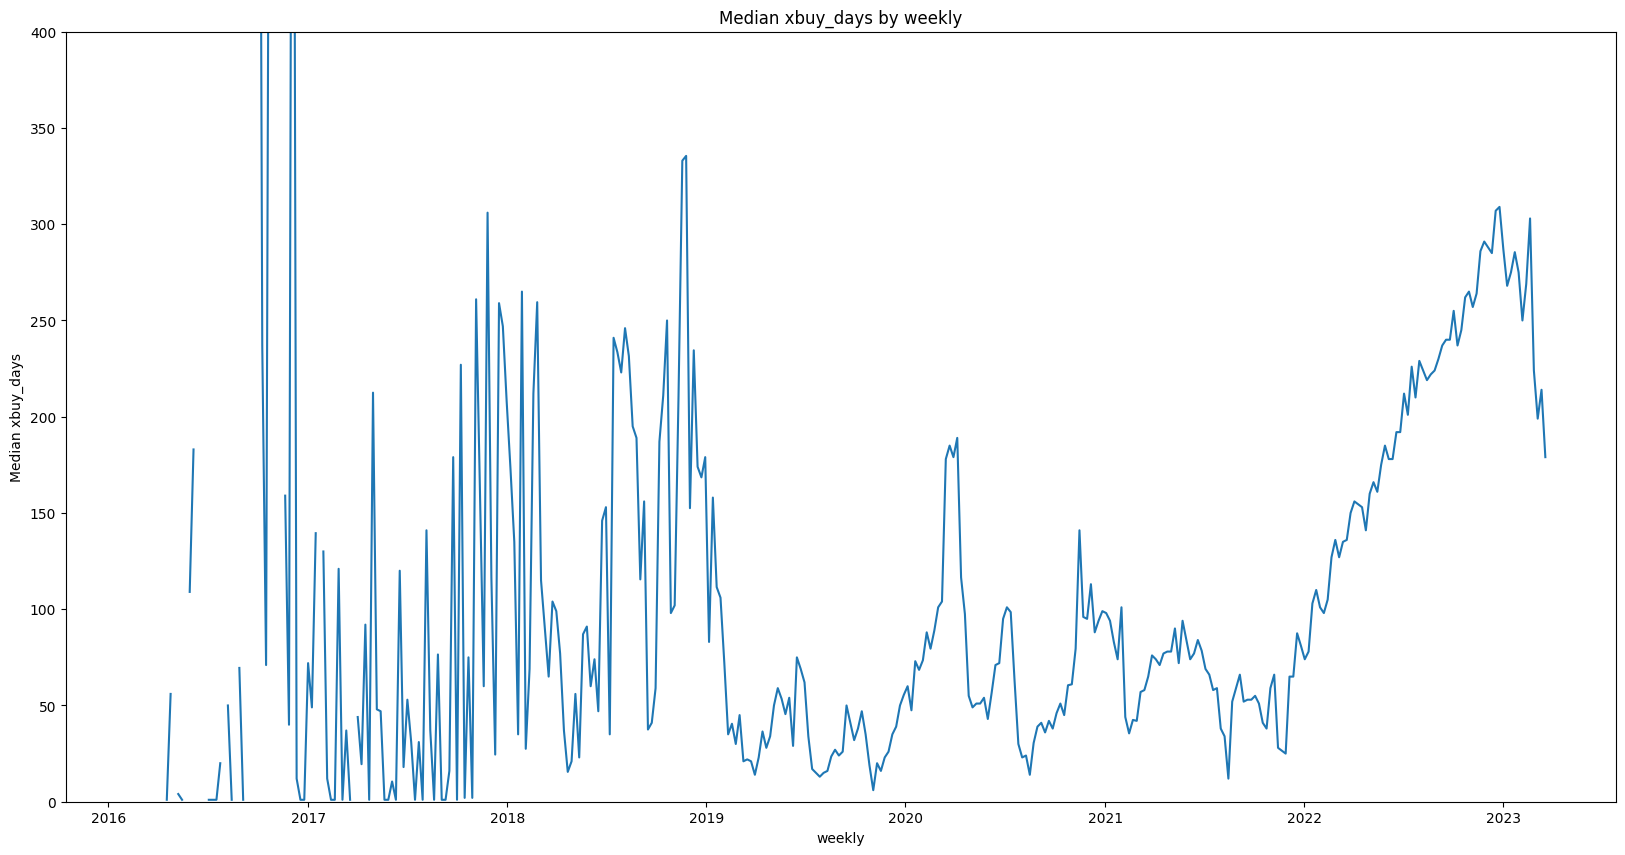

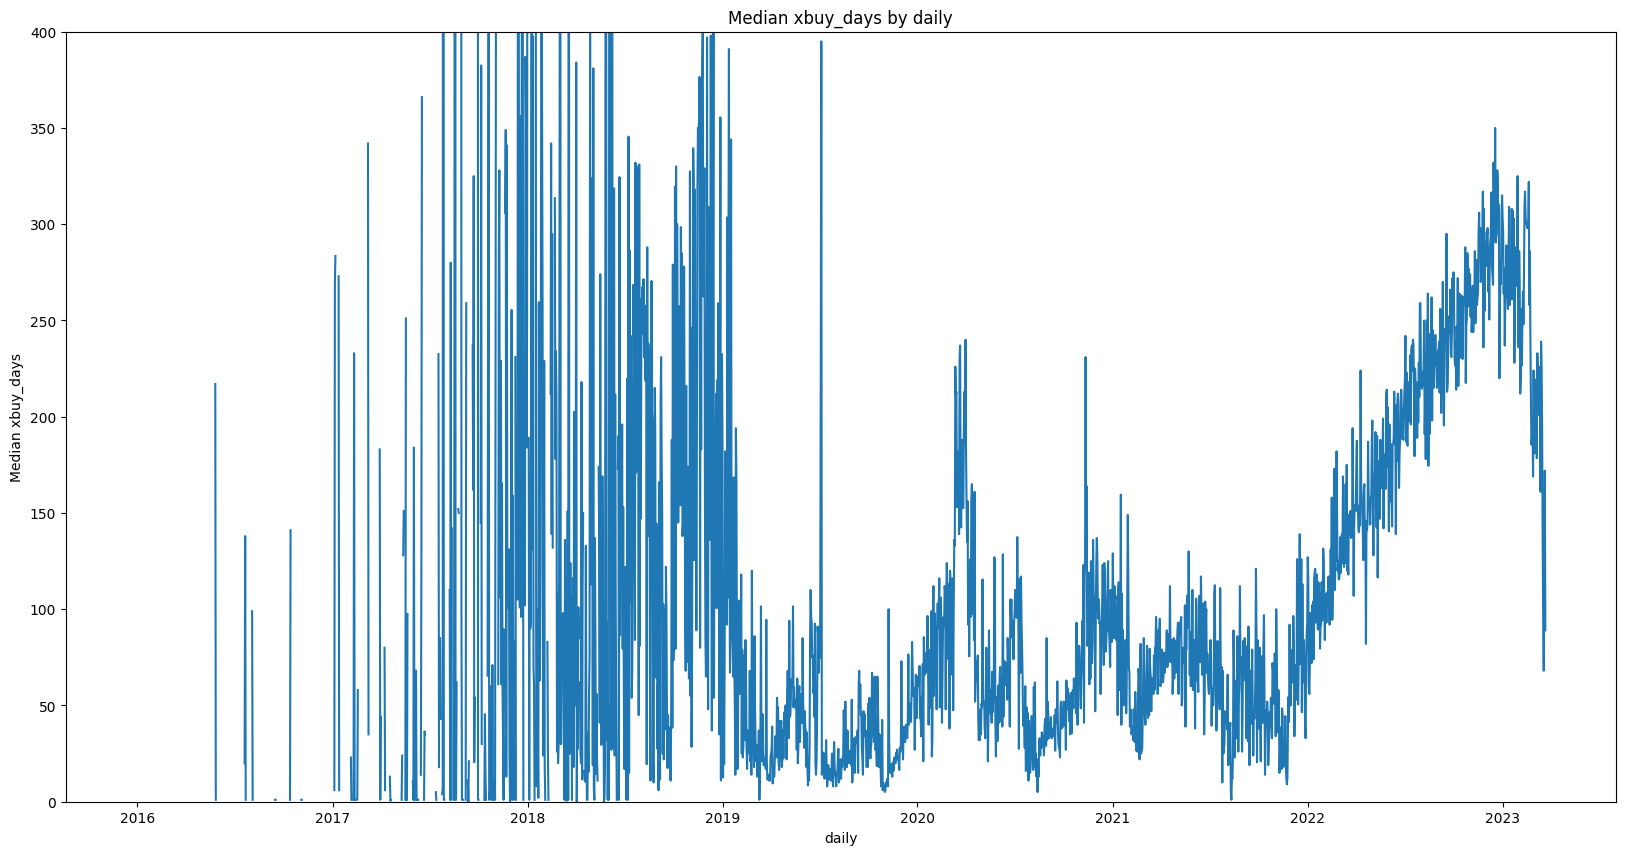

In [29]:
#plot the xbuy_map
def plot_xbuy_map(xbuy_map, daterange = 'monthly'):
    #convert the xbuy_map to a dataframe
    xbuy_map = pd.DataFrame.from_dict(xbuy_map, orient = 'index', columns = ['median_xbuy_days'])
    #plot the xbuy_map
    plt.figure(figsize = (20,10))
    plt.plot(xbuy_map.index, xbuy_map['median_xbuy_days'])
    plt.title('Median xbuy_days by ' + daterange)
    plt.xlabel(daterange)
    plt.ylabel('Median xbuy_days')
    # plt.xlim(left = date(2020,1,1), right = date(2023,1,1))
    plt.ylim(bottom = 0, top = 400)
    plt.show()
plot_xbuy_map(xbuy_map_yearly, daterange = 'yearly')
plot_xbuy_map(xbuy_map_monthly, daterange = 'monthly')
plot_xbuy_map(xbuy_map_weekly, daterange = 'weekly')
plot_xbuy_map(xbuy_map_daily, daterange = 'daily')

# Histograms

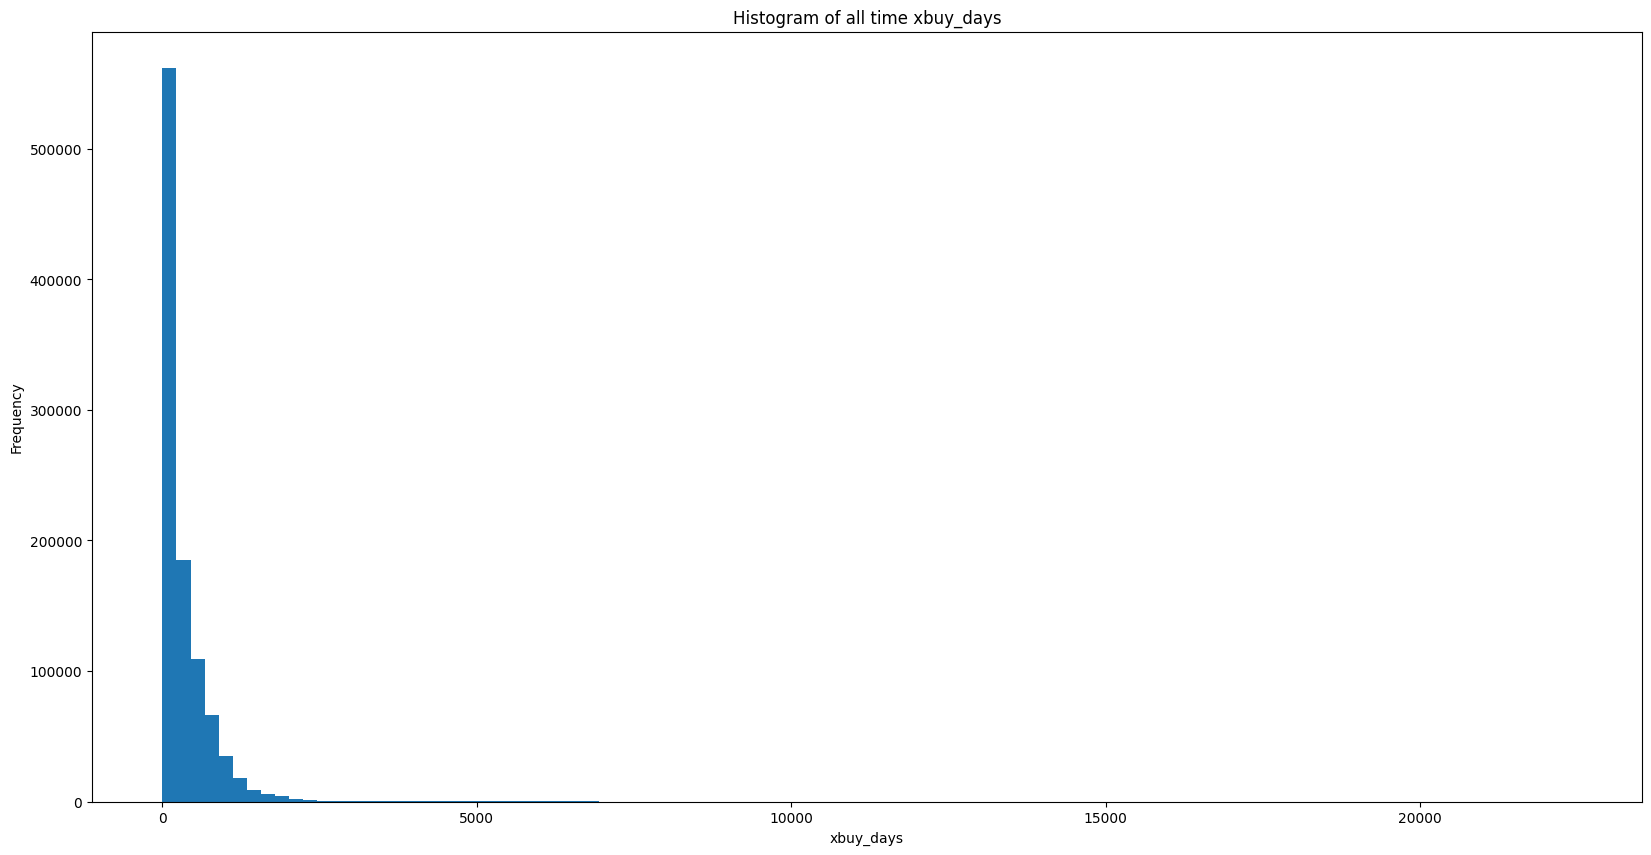

In [32]:
# Histogram of all time xbuy_days

vals = []
for key, value in xbuy_map_daily_all_vals.items():
    vals.extend(value)

plt.figure(figsize = (20,10))
plt.hist(vals, bins = 100)
plt.title('Histogram of all time xbuy_days')
plt.xlabel('xbuy_days')
plt.ylabel('Frequency')
plt.show()
